In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

transform = transforms.Compose([transforms.ToTensor()])

dataset = datasets.MNIST('.data', train=False, download=True,transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

for img, labels in dataloader:
    break

In [2]:
def set_kwargs():
    KWARGS_DICT = {'csdip':{"fmt":'r-', "label":'Ours', "marker":"^", "markersize":7,"capsize":4., "linewidth":1, "elinewidth":1},
              'dct':{"fmt":'g-', "label":'Lasso-DCT', "marker":"s", "markersize":7,"capsize":4., "linewidth":1, "elinewidth":1, "markerfacecolor":'None'},
              'wavelet':{"fmt":'b-', "label":'Lasso-DB4', "marker":"D", "markersize":7,"capsize":4., "linewidth":1, "elinewidth":1, "markerfacecolor":'None'},
               'bm3d':{"fmt":'o-', "label":'BM3D-AMP', "marker":"D", "markersize":7,"capsize":4., "linewidth":1, "elinewidth":1, "markerfacecolor":'None'},
               'tval3':{"fmt":'v-', "label":'TVAL3', "marker":"D", "markersize":7,"capsize":4., "linewidth":1, "elinewidth":1, "markerfacecolor":'None'},
               'csgm':{"fmt":'k-', "label":'CSGM', "marker":"D", "markersize":7,"capsize":4., "linewidth":1, "elinewidth":1, "markerfacecolor":'None'}    
              }
    return KWARGS_DICT

In [3]:
num_measurements= [10, 15, 25, 35, 50, 75, 100]
num_measurements= [25, 35, 50, 75, 100, 200]

rec_error = np.zeros((len(num_measurements), 100))
for i,m in enumerate(num_measurements):
    for j, (img, labels) in enumerate(dataloader):
        img = img.view(1,-1).numpy()
        if m == 200:
            rec = plt.imread('mnist_csgm/{0}/vae/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10/{1}.png'.format(m,j))
        else:
            rec = plt.imread('mnist_csgm/{0}/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/{1}.png'.format(m,j))
        rec_error[i,j] = 4*np.linalg.norm(rec.ravel()-img)**2/784.
        if j==99:
            break

<ErrorbarContainer object of 3 artists>

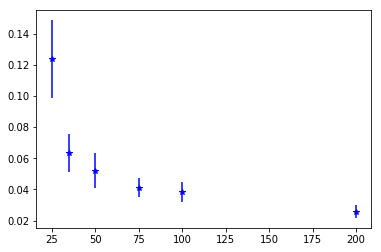

In [4]:
plt.errorbar(num_measurements,np.mean(rec_error, axis=1),yerr=2*np.std(rec_error, axis=1)/10.,fmt='b*')

In [12]:
import utils
from utils_plot import Args
import utils_plot as putils

args = Args() # create an argument class

args.DATASET = 'mnist' # 'mnist', 'xray', or 'retino' 
args.DEMO = 'False' # If 'True' run over 5 images for demo; else run over entire dataset
args.NUM_MEASUREMENTS_LIST = [75]
args.NUM_MEASUREMENTS_LIST = [25,35,50,75,100,200]
args.NOISE_LIST = [0,1,10,100,1000]
args.ALG_LIST = ['csdip','csgm']#'bm3d','tval3','dct','csgm'] # choose which algorithms to plot

args = putils.construct_arg(args)

In [6]:
## RUN BELOW CELL WITHOUT csgm IN ALG_LIST
## then when RECONSTRUCTIONS, MSE defined...
## ...go back and run above cell with csgm included
## ...finally skip over running the below cell again

In [8]:
dataloader = utils.get_data(args) # get original images in PyTorch object

# load reconstructions, compute mse
RECONSTRUCTIONS, MSE = putils.get_plot_data(dataloader, args)

In [10]:
def plot_mse(mse_alg, args, kwargs, alg):
    y_temp = []
    y_error = []
    x_temp = args.NUM_MEASUREMENTS_LIST
    
    for NUM_MEASUREMENTS in args.NUM_MEASUREMENTS_LIST:
        n = len(mse_alg[NUM_MEASUREMENTS])
        mse = np.mean(mse_alg[NUM_MEASUREMENTS])
        error = np.std(mse_alg[NUM_MEASUREMENTS]) / np.sqrt(1.0*n)
        y_temp.append(mse)
        y_error.append(error)

    plt.errorbar(x_temp,y_temp,y_error,**kwargs)

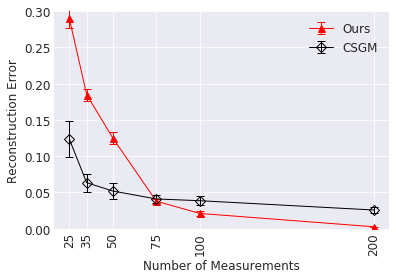

In [16]:
sns.set_style('darkgrid')
matplotlib.rc('font', size=12)
KWARGS_DICT = set_kwargs()

NUM_MEASUREMENTS = 75

# Plot MSE of each algorithm
for ALG in args.ALG_LIST:
    kwargs = KWARGS_DICT[ALG]
    if ALG == 'csgm':
        x_temp = num_measurements
        y_temp = np.mean(rec_error, axis=1)
        y_error = 2*np.std(rec_error, axis=1)/10.
        plt.errorbar(x_temp,y_temp,y_error,**kwargs)
    else:
        plot_mse(MSE[ALG], args, kwargs, ALG)


plt.ylabel('Reconstruction Error')
plt.xlabel('Number of Measurements')
plt.xticks(args.NUM_MEASUREMENTS_LIST,args.NUM_MEASUREMENTS_LIST, rotation=90)
plt.legend(loc='upper right')
plt.ylim([0,0.3])

#plt.savefig(fname='csgm_v_csdip.pdf',format='pdf', bbox_inches='tight')

plt.show()